In [72]:
from sympy import dsolve, Eq, symbols, Function, lambdify
from sympy.plotting import plot
import numpy as np
from matplotlib import pyplot as plt

In [59]:
func = lambdify(t, sol1.rhs,'numpy')
xvals = np.arange(0,10,.1)
yvals = func(xvals)

# make figure
fig, ax = plt.subplots(1,1,subplot_kw=dict(aspect='equal'))     
ax.plot(xvals, yvals)
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
plt.show()

TypeError: _lambdifygenerated() takes 0 positional arguments but 1 was given

In [10]:
t = symbols('t')
x = symbols('x', cls=Function)

deqn1 = Eq(x(t).diff(t), 1-x(t))
sol1 = dsolve(deqn1, x(t),ics={x(0):2})

print(sol1)

Eq(x(t), 1 + exp(-t))


In [76]:
t = symbols('t')

In [14]:
sol1

TypeError: 'Equality' object is not callable

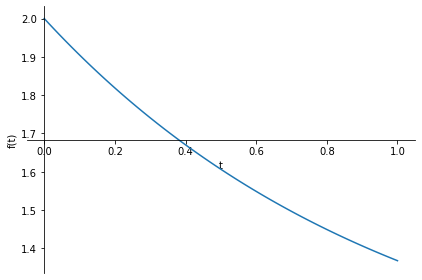

In [77]:
p1=plot(sol1.rhs,(t,0,1))

In [78]:
p1

In [37]:
f=sol1.rhs

In [38]:
t=[]

In [51]:
g=lambdify(t,f,'numpy')

In [57]:
f.subs()

TypeError: unhashable type: 'list'

In [58]:
plot()

NameError: name 'plot' is not defined